In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#將圖片數字標準化，直接除以255，讓每個數字可介於0~1之間
x_train, x_test = x_train / 255.0, x_test / 255.0

#60000 張圖片的資料集，每一張 32 x 32大小，10種分類

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 3ms/step - loss: 1.7215 - accuracy: 0.3655 - val_loss: 1.2305 - val_accuracy: 0.5559
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1715 - accuracy: 0.5840 - val_loss: 1.0710 - val_accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0078 - accuracy: 0.6454 - val_loss: 0.9761 - val_accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8930 - accuracy: 0.6866 - val_loss: 0.9402 - val_accuracy: 0.6732
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8228 - accuracy: 0.7113 - val_loss: 0.9223 - val_accuracy: 0.6865
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7587 - accuracy: 0.7343 - val_loss: 0.8607 - val_accuracy: 0.7028
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6949 - accuracy: 0.7566 - val_loss: 0.8679 - val_accuracy

313/313 - 0s - loss: 0.8833 - accuracy: 0.7114


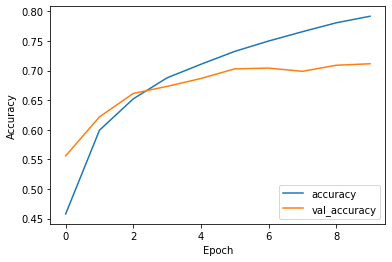

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
#total_params = (filter_height * filter_width * input_image_channels + 1) * number_of_filters
#total_params = (3*3*3+1) * 32 = 896
#total_params = (3*3*32+1) * 64 = 18496